<h1>Gradient Descent</h1>

In [25]:
#Import Pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<p>Let's revisit our Neural Network class and reexamine our results.</p>

In [26]:
#Neural Network
class NeuralNetwork(object):
    def __init__(self):
        #Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Synaptic Weights
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs feed forward through our network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply sigmoid activation function
        return 1/(1+np.exp(-z))

<p>Input Data:</p>

In [27]:
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

In [28]:
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

<br>
<p>Feed Forward pass of input data:</p>

In [29]:
NN = NeuralNetwork()
yHat = NN.forward(X)

In [30]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [31]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

<br>
<p>By comparing yHat to y, we can see how wrong our predictions are when we use random values for the synaptic weights.</p>

In [32]:
yHat

array([[ 0.77298086],
       [ 0.6727637 ],
       [ 0.65468556]])

<br>
<p>To visualize how poorly our synaptic weights are making our predictions, we can use ipython's built in matplotlib interface and graph our predicted results versus the actual results. Another term for this difference in prediction is the cost.</p>

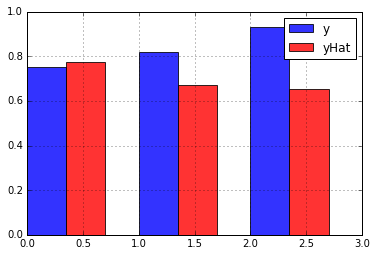

In [33]:
bar([0,1,2], y, width = 0.35, alpha=0.8)
bar([0.35,1.35,2.35],yHat, width = 0.35, color='r', alpha=0.8)
grid(1)
legend(['y', 'yHat'])

<br>
<p>Humans do not just think feed forward. Although feed forward networks are good for making decisions, and the perceptron model can get as advanced as NAND gates (as some research into circuits will show), they do not correct themselves when they make incorrect decisions. This is the problem with our network.</p>
<br>
<p>Imagine it is wintertime, and you need to drive to class in an old car. Before your car can run you must warm up the engine and the cold oil, allowing it to disperse around your car's inner mechanics. Each time you drive to class you are going to try a random value for time to warm up your car. The synaptic weight you apply to that time for it's quantification of success would be similar to the weights in our scenario. Eventually, we will devise a way to test some random values, find the best random value, and simulate learning. Right now, using our neural network, sometimes we would choose the right value for time, and sometimes we would not, and we would not account for error. The goal of this week's journal is to find a way to quantify this error. We will visit how to train the network in Week 4's journal.</p>
<br>
<p>Our data is dependent upon the input values X and y, and the synaptic weights. When we run our network feed forward on X, we can use the predicted results, yHat and y to analyze the error, or "cost" of our values for W. This function can be expressed as J=(y-yHat), where J is the cost. This function is good, but let's modify it somewhat. Later in this journal series, we will analyze why we chose this cost function, but for now, let us set J=1/2(y-yHat)<sup>2</sup>. Additionally, we have many synaptic weights, and we need to test all 9 of our values for W, so our function becomes: J = &Sigma;1/2(y-yHat)<sup>2</sup>.</p>
<br>
<p>As Stephen Welch states, "When someone refers to training a network, what they really mean is minimizing a cost function."</p>
<br>
<p>Now that we know our goal, we need to simply adjust values of W to minimize our cost function. How long does this take however? Let's explore that question using Python's time class on just one synaptic weight for 1000 random values for W.</p>

In [34]:
import time

weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros(1000)

startTime = time.clock()
for i in range(1000):
    NN.W1[0,0] = weightsToTry[i]
    yHat = NN.forward(X)
    costs[i] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()

In [35]:
timeElapsed = endTime-startTime
timeElapsed

0.03247300000000308

<br>
<p>If we entertain the idea that the above result of about .3 seconds is reasonable, we can just plot our weights and the cost and pick the smallest value.</p>

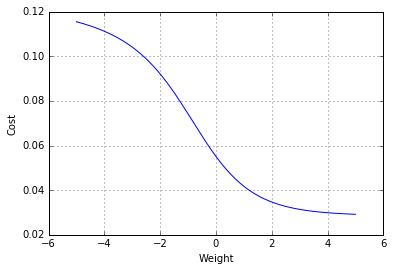

In [36]:
plot(weightsToTry, costs)
grid(1)
ylabel('Cost')
xlabel('Weight')

<br>
<p>We have indeed successfully minimized our cost function in terms of one synaptic weight, however, lets see how long it takes to simply try 1000 random values for 2 weights...</p>

In [37]:
weightsToTry = np.linspace(-5,5,1000)
costs = np.zeros((1000, 1000))

startTime = time.clock()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weightsToTry[i]
        NN.W1[0,1] = weightsToTry[j]
        yHat = NN.forward(X)
        costs[i, j] = 0.5*sum((y-yHat)**2)
    
endTime = time.clock()

In [38]:
timeElapsed = endTime-startTime
timeElapsed

16.194325

<br>
<p>Ouch, that is starting to take some time. This is due to dimensionality, as demonstrated by the calculation below which shows how long it would take to check 9 weights for 1000 random values. The answer is more than the time since the birth of the universe, so let's try and find a better way to minimize our cost function.</p>

In [39]:
0.04*(1000**(9-1))/(3600*24*365)

1268391679350583.5

<p>So far, our network takes some normalized input matrix, X and multiplies it by our first layer of synaptic weights W<sup>1</sup> to get matrix Z<sup>2</sup>. Next, this matrix is multiplied by our activation function, f(Z<sup>2</sup>) to get matrix a<sup>2</sup>. a<sup>2</sup> is multiplied by the second layer of synaptic weights W<sup>2</sup> to find Z<sup>3</sup>, and finally we apply our activation function to Z<sup>3</sup> to find yHat, our predicted test scores.</p>
<br>
<h4>Equations</h4>
<li>1. Z<sup>(2)</sup> = XW<sup>(1)</sup></li>
<li>2. a<sup>(2)</sup> = f( Z<sup>(2)</sup> )</li>
<li>3. Z<sup>(3)</sup> = a<sup>(2)</sup>W<sup>(2)</sup></li>
<li>4. yHat = f( Z<sup>(3)</sup> )
<p>Additionally, we found that if we change the values for the weights, it has an effect on the output yHat. More specifically, if we create an equation for the difference between yHat and y, or a cost function J, we can quantify how wrong our predictions are and adjust the synaptic weights accordingly. We chose this cost function to be J = &Sigma;(1/2(y - yHat)<sup>2</sup>). By choosing the correct combination of synaptic weights we can minimize the cost function and ensure we are making the best possible predictions. Now our list of equations becomes...</p>
<br>
<h4>Equations</h4>
<li>1. Z<sup>(2)</sup> = XW<sup>(1)</sup></li>
<li>2. a<sup>(2)</sup> = f( Z<sup>(2)</sup> )</li>
<li>3. Z<sup>(3)</sup> = a<sup>(2)</sup>W<sup>(2)</sup></li>
<li>4. yHat = f( Z<sup>(3)</sup> )
<li>5. J = &Sigma;(1/2(y - yHat)<sup>2</sup>)</li>

<p>Let's rewrite our equations in terms of our cost function, J.</p>
<br>
<p>J = &Sigma; 1/2( y - f( f( XW<sup>(1)</sup> ) W<sup>(2)</sup> ) )<sup>2</sup>
<br>
<br>
<li>J is dependent on our input matrix X, our input results y, the feed forward prediction matrix yHat, and the two synaptic weight matrices W<sup>(1)</sup> and W<sup>(2)</sup>.</li></p>

<p>We have no control over our input data, as that is a model of real life information and if manipulated, would manipulate our results. What we do have to work with are our weights. If we can find how J changes in respect to W<sup>(1)</sup> and W<sup>(2)</sup>, or in other words the partial derivative of J in terms of W, or &part;J/&part;W<sup>(1)</sup> and &part;J/&part;W<sup>(2)</sup>, we can find where our function is going downhill.</p>

<p>We can increase or decrease W<sup>(1)</sup> and W<sup>(2)</sup> and observe it's effect on our partial derivatives. If they are increasing we know that the rate of change is positive, and similarly if they are negative, the rate of change is decreasing. If we iteratively repeat this process until the partial derivatives stop decreasing, then we have reached the minimum of our cost function and have completed our objective; or in other words have found a combination of synaptic weights that minimizes the cost.</p>

<img src = "gradientDescent.png" width = "400" align = "left"></img>

<a href = "http://i.stack.imgur.com/xJgdz.png">-source</a>

<p>This is the core idea of Gradient Descent. We have a function and we find where the slope of that function is at a minimum, or zero. This value corresponds to the best possible synaptic weights for that synapse. The next step in our Neural Network is Backpropagation, so now we will need to derive values for &part;J/&part;W<sup>(1)</sup> and &part;J/&part;W<sup>(2)</sup></p>

<p>*It is important to now bring up why we chose our cost function to be the sum of squared errors. If you examine the graph above, it is very clear to see where the minimum is, however observe the graph below.</p>

<img src = "localMin.gif" width = "400" align = "left"></img>

<a href = "http://borisv.lk.net/matsc597c-1997/introduction/Lecture5/img44.gif">-source</a>

<p>As you can see, there is still a possibility that gradient descent will find a local minimum rather than the necessary global minimum. Luckily for us, the sum of squared errors function is naturally convex, and is naturally convex for really high dimensions as well, which is good for us considering our optimization space is 9 dimensional!</p>